# <font color=darkred> Explore-exploit dilemma </font>

## <font color=darkblue> Optimistic initial value Algorithm </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
bandit_probability = [0.2,0.5,0.75]
bandit_tries = [1,1,1]
N_tries=10000

win_rate = np.zeros(N_tries+1)
reward_vector=np.zeros(N_tries+1)
reward_vector[0]=100
total_reward = 100
num_optimal = 0
optimal_bandit = bandit_probability.index(max(bandit_probability))

In [3]:
#returns 1 (success) with the probability of the slot machine picked up and 0 otherwise
# i is the parameter representing the slot machine which is played

def pull(i):
    global total_reward
    bandit_tries[i]+=1 
    est = random.random()
    if est < bandit_probability[i]:
        x = 1     #x is the reward of the slot machine which is either 0 or 1
        total_reward+=1
        return(x)
    else : 
        x = 0
        return(x)  

In [4]:
#This function updates the estimated win rates of the slot machines, by calculating the samples mean

def update(i,x):
    bandit_est_prob[i] = (1/bandit_tries[i])*(bandit_est_prob[i]*(bandit_tries[i]-1)+x)

In [13]:
def epsilon_greedy(initial_value):
    global num_optimal, num_times_exploited, num_times_explored, bandit_est_prob
    bandit_est_prob=[initial_value,initial_value,initial_value]
    for i in range (N_tries):    
        j = bandit_est_prob.index(max(bandit_est_prob))
        if j == optimal_bandit:
            num_optimal+=1
        reward = pull(j)
        reward_vector[i+1]=reward
        update(j,reward)

In [19]:
initial_value=5
epsilon_greedy(initial_value)

The total reward earned is 7532
The overall win rate is 74.32%
The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is 99.74%
The estimated mean for the first slot machine is 0.7058823529411765 and the real one is 0.2
The estimated mean for the second slot machine is 0.7272727272727273 and the real one is 0.5
The estimated mean for the third slot machine is 0.7445614035087698 and the real one is 0.75
The number of times the first bandit is chosen is 17
The number of times the second bandit is chosen is 11
The number of times the third bandit is chosen is 9975


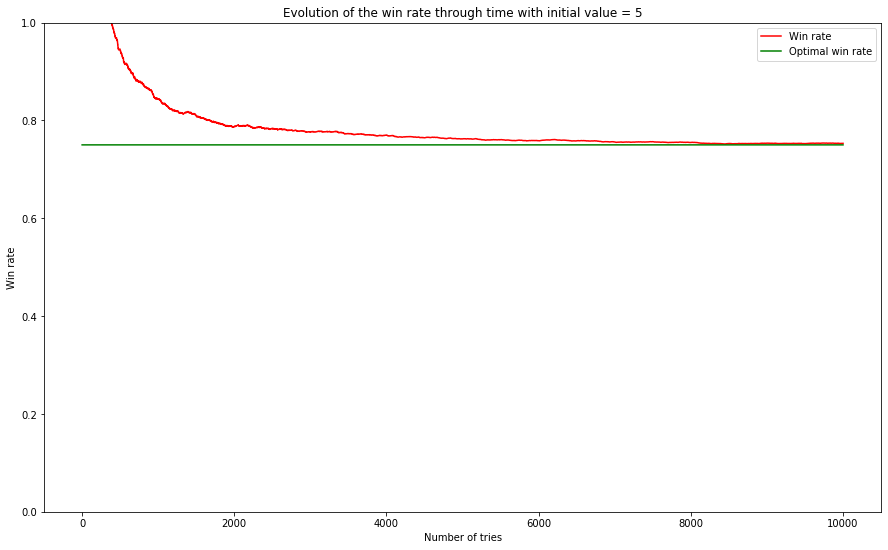

In [20]:
print("The total reward earned is "+str(total_reward))
print("The overall win rate is "+str(100*(total_reward-100)/N_tries)+"%")
print("The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is "+str(100*num_optimal/N_tries)+"%")
print("The estimated mean for the first slot machine is "+str(bandit_est_prob[0])+" and the real one is "+str(bandit_probability[0]))
print("The estimated mean for the second slot machine is "+str(bandit_est_prob[1])+" and the real one is "+str(bandit_probability[1]))
print("The estimated mean for the third slot machine is "+str(bandit_est_prob[2])+" and the real one is "+str(bandit_probability[2]))
print("The number of times the first bandit is chosen is "+str(bandit_tries[0]))
print("The number of times the second bandit is chosen is "+str(bandit_tries[1]))
print("The number of times the third bandit is chosen is "+str(bandit_tries[2]))

win_rate=np.cumsum(reward_vector)/(np.arange(N_tries+1)+1)
optimal_win_rate=np.ones(N_tries+1)*max(bandit_probability)

plt.figure(figsize=(15, 9))
plt.plot(win_rate[:], 'r', lw=1.5, label='Win rate')
plt.plot(optimal_win_rate[:], 'g', lw=1.5, label='Optimal win rate')
plt.xlabel('Number of tries')
plt.ylabel('Win rate')
plt.ylim([0,1])
plt.legend()
plt.title("Evolution of the win rate through time with initial value = "+str(initial_value))
plt.show()

In [24]:
initial_value=10
epsilon_greedy(initial_value)

The total reward earned is 7597
The overall win rate is 74.97%
The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is 99.42%
The estimated mean for the first slot machine is 0.7000000000000002 and the real one is 0.2
The estimated mean for the second slot machine is 0.6999999999999996 and the real one is 0.5
The estimated mean for the third slot machine is 0.7527909081766059 and the real one is 0.75
The number of times the first bandit is chosen is 20
The number of times the second bandit is chosen is 40
The number of times the third bandit is chosen is 9943


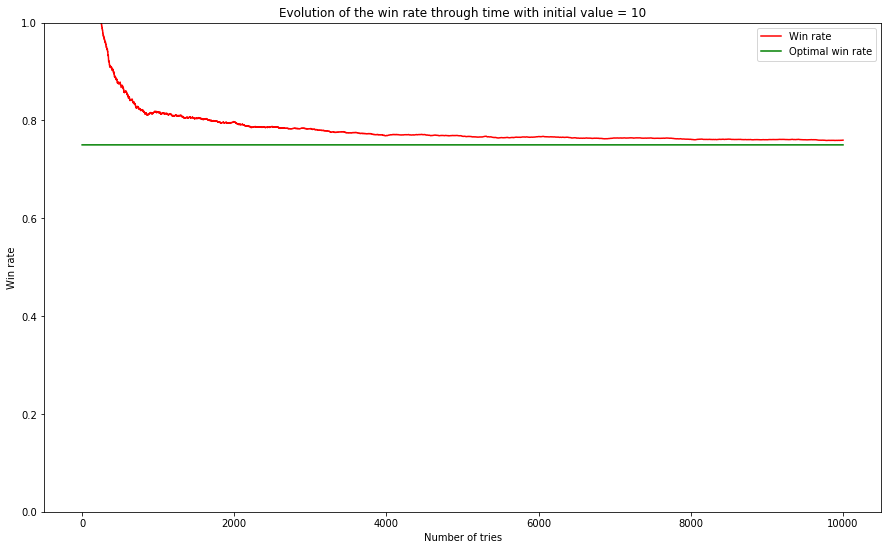

In [25]:
print("The total reward earned is "+str(total_reward))
print("The overall win rate is "+str(100*(total_reward-100)/N_tries)+"%")
print("The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is "+str(100*num_optimal/N_tries)+"%")
print("The estimated mean for the first slot machine is "+str(bandit_est_prob[0])+" and the real one is "+str(bandit_probability[0]))
print("The estimated mean for the second slot machine is "+str(bandit_est_prob[1])+" and the real one is "+str(bandit_probability[1]))
print("The estimated mean for the third slot machine is "+str(bandit_est_prob[2])+" and the real one is "+str(bandit_probability[2]))
print("The number of times the first bandit is chosen is "+str(bandit_tries[0]))
print("The number of times the second bandit is chosen is "+str(bandit_tries[1]))
print("The number of times the third bandit is chosen is "+str(bandit_tries[2]))

win_rate=np.cumsum(reward_vector)/(np.arange(N_tries+1)+1)
optimal_win_rate=np.ones(N_tries+1)*max(bandit_probability)

plt.figure(figsize=(15, 9))
plt.plot(win_rate[:], 'r', lw=1.5, label='Win rate')
plt.plot(optimal_win_rate[:], 'g', lw=1.5, label='Optimal win rate')
plt.xlabel('Number of tries')
plt.ylabel('Win rate')
plt.ylim([0,1])
plt.legend()
plt.title("Evolution of the win rate through time with initial value = "+str(initial_value))
plt.show()

## <font color=darkblue> Conclusion and remarks </font>

We can first state the estimated probabilities of suboptimal bandits are far from the real values. This is logic because we use here a greedy algorithm that chooses the bandit arm with the higher estimated value. As all initial values are initialized with the same value (which is chosen higher than the optimal value), then the suboptimal bandits will not be chosen when their estimated values goes beyond the higher estimated value. This explains the very low numbers of times suboptimal bandits are chosen. The greater the initial value, the higher the number of times suboptimal bandits are chosen because their estimated values will decrease slowly if the initial value is high. This is the reason why only the optimal value is well estimated. 

In fact, the initial value is a hyperparameter that controls the amount of exploration. When it is very high comparing to true values, then the exploration will be greater because the estimated values will take time to decrease below the optimal value and during this time, suboptimals will be chosen by the greedy algorithm. Here when the initial value is set to 5, 28 times out of 10000 the suboptimals are chosen. When the initial value is set to 10, 60 times out of 10000 the suboptimals are chosen, so the exploration is "wider". 

We can also state that the initial value method gives better results than the epsilon greedy method. But it only gives a good estimation of the optimal bandit. This estimation is overestimating the sample means because of the initial value, but it gets very close to the real mean as the number of samples increase. 